<a href="https://colab.research.google.com/github/Amruthakap3/AML/blob/main/analysis_of_heart_disease_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [641]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/Amruthakap3/AML/main/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [642]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Plot distribution of age and sex for each target class.

Text(0.5, 1.0, 'Gender vs Target\n')

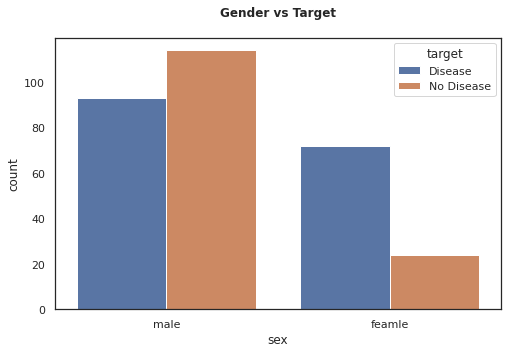

In [643]:
# Plot distribution of sex according to target class.

data2 = data.copy()

data2 = data.copy()

data2['sex'] = data2['sex'].map({0: 'feamle', 1: 'male'})
data2['target'] = data2['target'].map({0: 'No Disease', 1: 'Disease'})

fig, ax = plt.subplots(figsize=(8,5))
name = data2['sex']
ax = sns.countplot (x='sex',hue='target',data=data2,)
ax.set_title('Gender vs Target\n',weight ='bold')


Text(0.5, 1.0, 'Age vs Target\n')

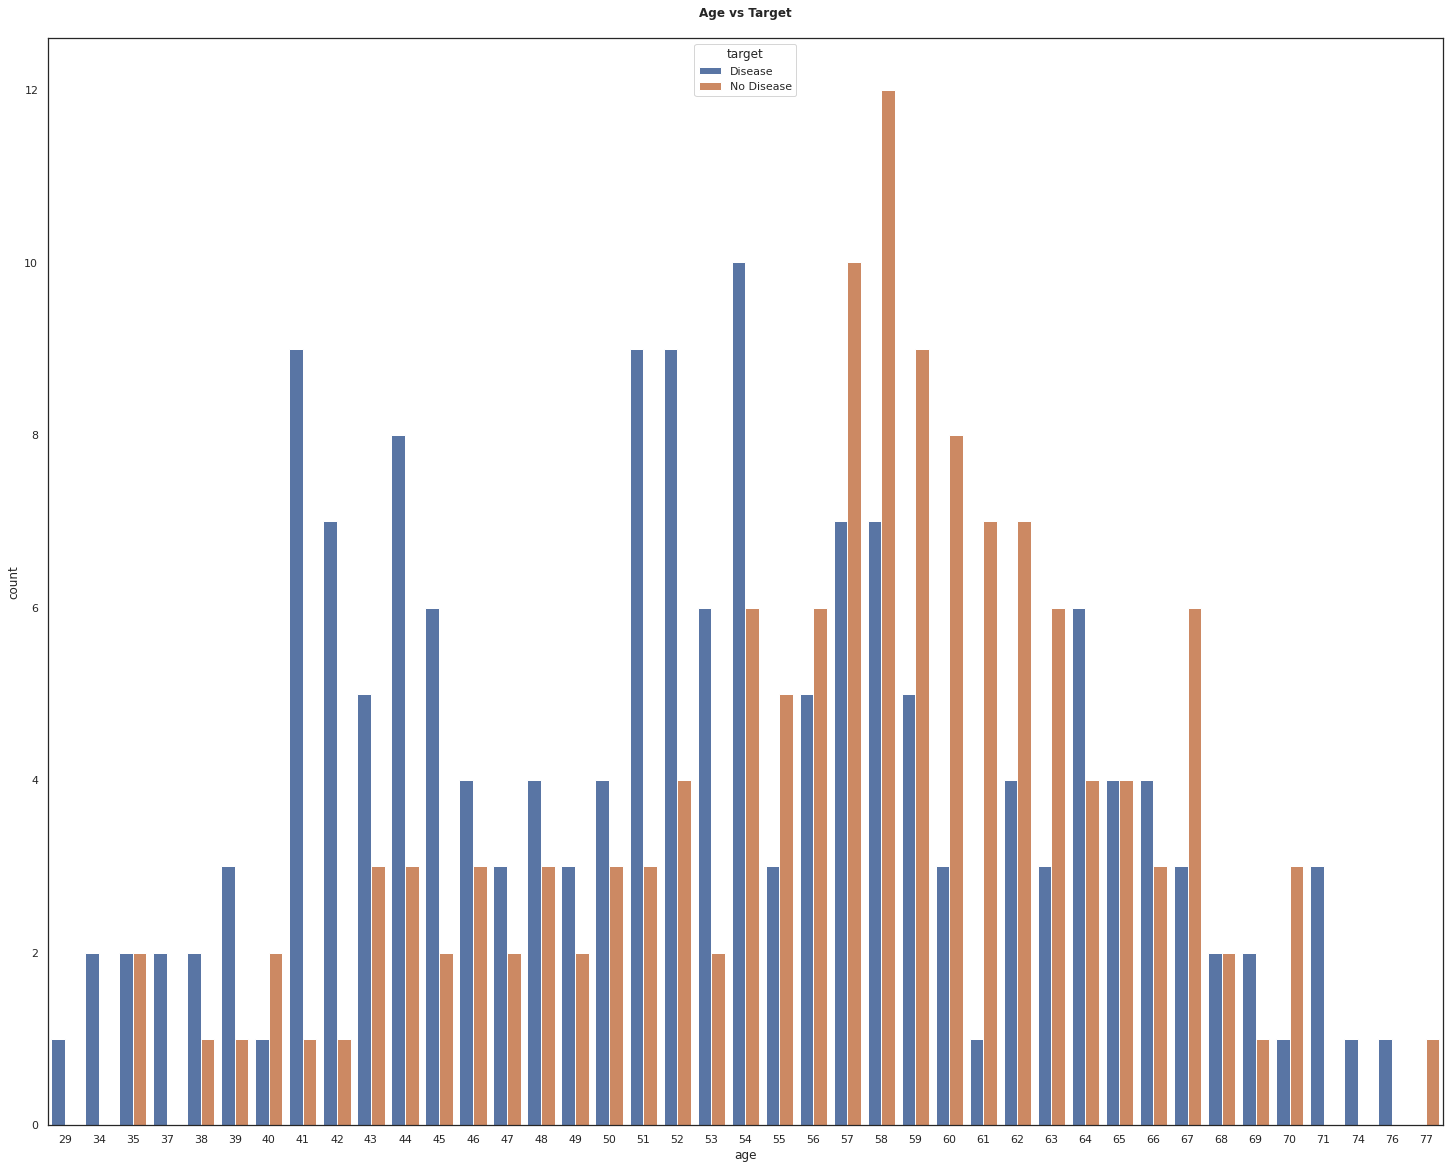

In [644]:
# Plot distribution of age according to target class.

data2 = data.copy()
fig, ax = plt.subplots(figsize=(25,20))
data2['target'] = data2['target'].map({0: 'No Disease', 1: 'Disease'})
name = data2['age']
ax = sns.countplot (x='age',hue='target',data=data2,)
ax.set_title('Age vs Target\n',weight ='bold')

Text(0.5, 1.0, 'Age Distribution')

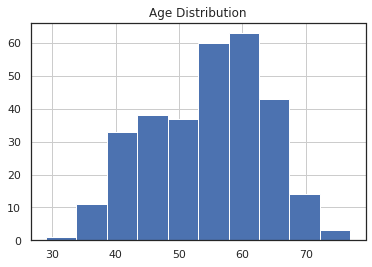

In [645]:
#Age variable distribution
data2 = data.copy()
data2['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

# Plot correlation values for all features with respect to the target class.

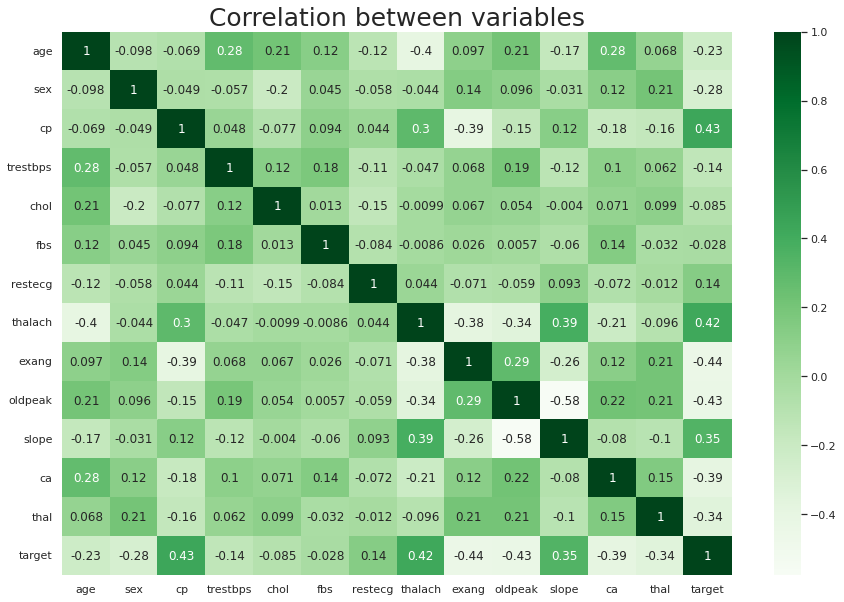

In [646]:
#correlation
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title('Correlation between variables', fontsize=25)
plt.show()

In [647]:
#drop colums with low correlation
columns = ['fbs', 'chol', 'trestbps']
data.drop(columns, inplace=True, axis=1)
data.head()

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0,150,0,2.3,0,0,1,1
1,37,1,2,1,187,0,3.5,0,0,2,1
2,41,0,1,0,172,0,1.4,2,0,2,1
3,56,1,1,1,178,0,0.8,2,0,2,1
4,57,0,0,1,163,1,0.6,2,0,2,1


# Data Preparation

1) Deling with outliers

In [648]:
#Check outliers in continuous variable 
#Using Interquartile Range technique, please find the reference below
#https://www.scribbr.com/statistics/interquartile-range/

def remove_outliers(feature_data):
  Q1 = np.percentile(feature_data, 25.)
  Q3 = np.percentile(feature_data, 75.)
  outlier_const = (Q3-Q1) * 1.5
  outliers = feature_data[~((feature_data >= Q1 - outlier_const) & (feature_data <= Q3 + outlier_const))].index.tolist() 
  print('For the feature {}, No of Outliers is {}'.format(feature_data.name, len(outliers)))
  if len(outliers) > 0:
    data.drop(outliers, inplace = True, errors = 'ignore')
    print('Outliers from feature removed')

for feature in ['age','thalach','oldpeak']:
  remove_outliers(data[feature])  

For the feature age, No of Outliers is 0
For the feature thalach, No of Outliers is 1
Outliers from feature removed
For the feature oldpeak, No of Outliers is 5
Outliers from feature removed


2) Dealing with missing values and impute as necessary

In [649]:
#Check for any missing feature values and impute as necessary.

#To know the type of the variable.
print('Type of the variables')
print('------------------------------------')
print(data.nunique())
print('#####################################')


# The Feature CA ranges from 0 to 3, but listed values 0-4, so update 4 to NaN
print('Unique `ca` value before', data['ca'].unique())
#Update CA value 4 to NaN
data.loc[data['ca']==4,'ca']= np.NaN
print('Unique `ca` value after', data['ca'].unique())
print('#####################################')



#Feature 'thal' range from 1-3, but there are some '0''s replace it with NaN
print('Unique `thal` value before', data['thal'].unique())
data.loc[data['thal']==0,'thal']= np.NaN
print('Unique `thal` value after', data['thal'].unique())
print('#####################################')

print('Sum of Null values before')
print('------------------------------------')
#Replace NaN with median (Not using data pipeline here, going for a simple approch)
data = data.fillna(data.median())
data.isnull().sum()




Type of the variables
------------------------------------
age        41
sex         2
cp          4
restecg     3
thalach    90
exang       2
oldpeak    36
slope       3
ca          5
thal        4
target      2
dtype: int64
#####################################
Unique `ca` value before [0 2 1 3 4]
Unique `ca` value after [ 0.  2.  1.  3. nan]
#####################################
Unique `thal` value before [1 2 3 0]
Unique `thal` value after [ 1.  2.  3. nan]
#####################################
Sum of Null values before
------------------------------------


age        0
sex        0
cp         0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

3) Geting Ready the with regular and scaled data 

In [650]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Try the scaled data set
X = data[data.columns.difference(['target'])]
Y = data[['target']]

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
        #Playing with diffrent scalers 
        #('scaler', RobustScaler())          
])


print("X shape", str(X.shape))
print("Y shape", str(Y.shape))

X_tranform = num_pipeline.fit_transform(X)
scaled_X = pd.DataFrame(X_tranform, columns=X.columns, index=X.index)

print("scaled X shape", str(X.shape))
scaled_X.head()

X shape (297, 10)
Y shape (297, 1)
scaled X shape (297, 10)


,age,ca,cp,exang,oldpeak,restecg,sex,slope,thal,thalach
0,0.957343,-0.710497,1.971690,-0.696419,1.263000,-1.004885,0.685782,-2.374011,-2.292256,-0.008846
1,-1.896944,-0.710497,0.997327,-0.696419,2.406341,0.920604,0.685782,-2.374011,-0.559941,1.638796
2,-1.457823,-0.710497,0.022965,-0.696419,0.405495,-1.004885,-1.458189,0.967606,-0.559941,0.970833
3,0.188881,-0.710497,0.022965,-0.696419,-0.166176,0.920604,0.685782,0.967606,-0.559941,1.238018
4,0.298662,-0.710497,-0.951398,1.435916,-0.356733,0.920604,-1.458189,0.967606,-0.559941,0.570055


# Split the data set into 80-20 for training and testing

In [651]:
# Split the dataset into the training set (80%) and testing (20%)
# random_state Controls the shuffling applied to the data before applying the split. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

print("X_train shape", str(X_train.shape))
print("Y_train shape", str(Y_train.shape))

print("X_test shape", str(X_test.shape))
print("Y_test shape", str(Y_test.shape))

#Split the scaled data
scaled_X_train, scaled_X_test, scaled_Y_train, scaled_Y_test = train_test_split(scaled_X, Y, test_size = 0.20, random_state = 0)

X_train shape (237, 10)
Y_train shape (237, 1)
X_test shape (60, 10)
Y_test shape (60, 1)


# **LogisticRegression**



1.   Performing LogisticRegression with scaled and unscled data
2.   Display Accuracy scores on the training and testing sets
3.   Print the The confusion matrix for unscaled data
4.   Plot ROC Curve for model trained by unscaled data






 

In [652]:
# Parallelize the first classification job over 5 workers
# Use Lasso regression 
# The SAGA solver supports the non-smooth penalty=l1 option (i.e. L1 Regularization).
# SAGA is the solver of choice for sparse multinomial logistic regression 
# and it's also suitable very large datasets.

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

# Fit the model
print("Unscaled data learning report")
print('----------------------------')
lr_classifier.fit(X_train, Y_train)  

Unscaled data learning report
----------------------------
convergence after 86 epochs took 0 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [653]:
#Logistic regression with scaled data
lr_classifier2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

# Fit the model
print("Scaled data learning report")
print('----------------------------')
lr_classifier2.fit(scaled_X_train, scaled_Y_train) 

Scaled data learning report
----------------------------
convergence after 11 epochs took 0 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [654]:
# Accuracy scores on the training and testing sets

score1 = round(lr_classifier.score(X_train, Y_train), 2) # training score
score2 = round(lr_classifier.score(X_test, Y_test), 2)   # testing score

scaled_score1 = round(lr_classifier2.score(scaled_X_train, scaled_Y_train), 2) # training score
scaled_score2 = round(lr_classifier2.score(scaled_X_test, scaled_Y_test), 2)   # testing score

print ("Uncaled data Training and Testing scores: %.2f, %.2f" %  (score1, score2))
print ("Scaled data Training and Testing scores: %.2f, %.2f" %  (scaled_score1, scaled_score2))

Uncaled data Training and Testing scores: 0.76, 0.62
Scaled data Training and Testing scores: 0.88, 0.80


In [655]:
# The confusion matrix for unscaled data
from sklearn.metrics import confusion_matrix, classification_report
lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
lr_confusion_matrix = pd.DataFrame(lr_cm, index=labels, columns=labels)

print("Confusion Matrix (Unscaled)")
print('----------------------------')
print(lr_confusion_matrix)

print("Classification Report (Unscaled)")
print('----------------------------')
print(lr_cr)


Confusion Matrix (Unscaled)
----------------------------
    0   1
0  14  17
1   6  23
Classification Report (Unscaled)
----------------------------
              precision    recall  f1-score   support

           0       0.70      0.45      0.55        31
           1       0.57      0.79      0.67        29

    accuracy                           0.62        60
   macro avg       0.64      0.62      0.61        60
weighted avg       0.64      0.62      0.61        60



In [656]:
# The confusion matrix for for scaled data
from sklearn.metrics import confusion_matrix, classification_report
lr_predictions2 = lr_classifier2.predict(scaled_X_test)

labels2 = lr_classifier2.classes_

# compute TP, TN, FP, FN values
lr_cm2 = confusion_matrix(y_true=scaled_Y_test, 
                      y_pred = lr_predictions2, 
                      labels = labels2)

# compute recall, precision, f1-scores
lr_cr2 = classification_report(y_true=scaled_Y_test, 
                      y_pred = lr_predictions2, 
                      labels = labels2)

# print confusion matrix
lr_confusion_matrix2 = pd.DataFrame(lr_cm2, index=labels2, columns=labels2)

print("Confusion Matrix (scaled data)")
print('----------------------------')
print(lr_confusion_matrix2)

print("Classification Report (scaled data)")
print('----------------------------')
print(lr_cr2)

Confusion Matrix (scaled data)
----------------------------
    0   1
0  20  11
1   1  28
Classification Report (scaled data)
----------------------------
              precision    recall  f1-score   support

           0       0.95      0.65      0.77        31
           1       0.72      0.97      0.82        29

    accuracy                           0.80        60
   macro avg       0.84      0.81      0.80        60
weighted avg       0.84      0.80      0.80        60



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


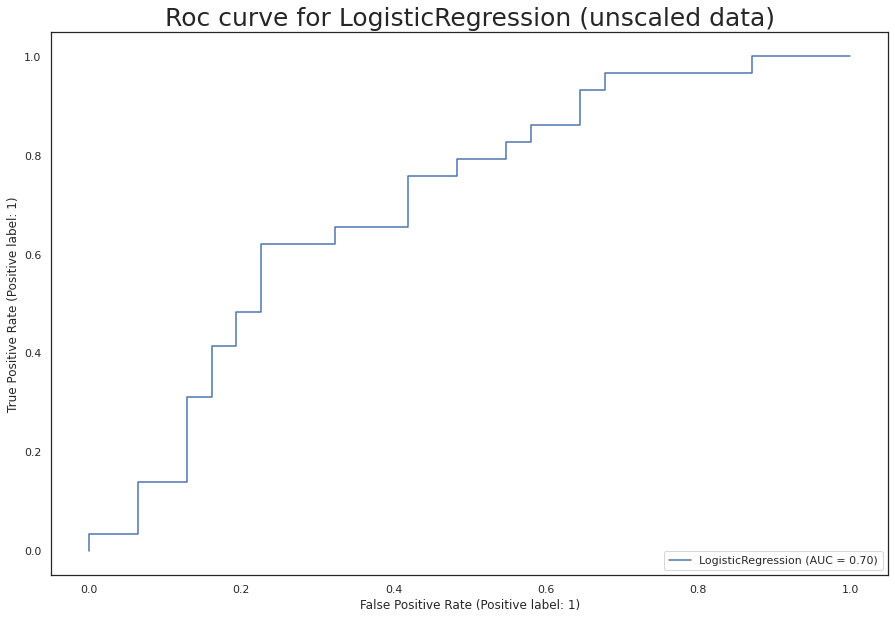

In [657]:
#ROC Curve for model trained by unscaled data
ax = plt.gca()
rfc_disp = plot_roc_curve(lr_classifier, X_test, Y_test, ax=ax)
plt.title("Roc curve for LogisticRegression (unscaled data)", fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


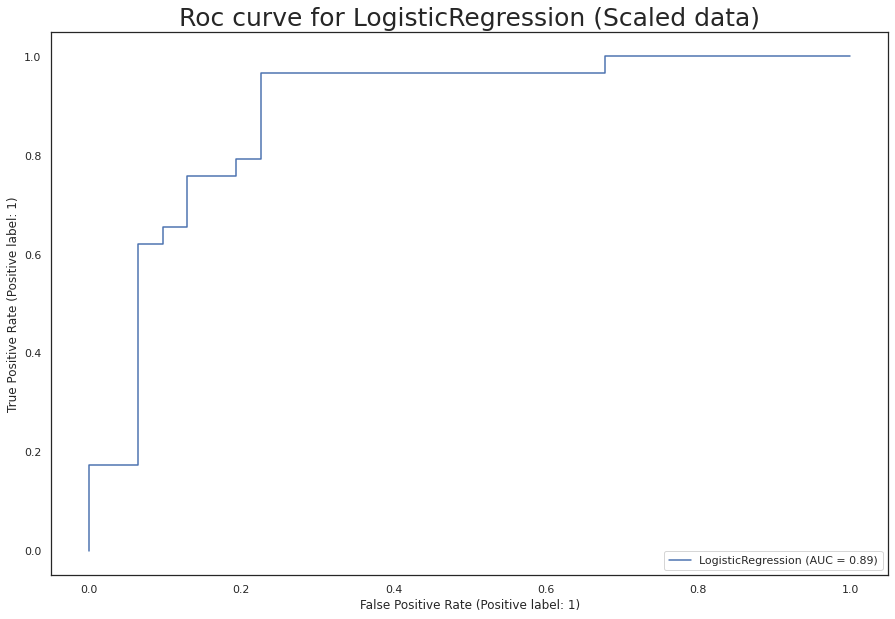

In [658]:
#ROC Curve for model trained by unscaled data
ax = plt.gca()
rfc_disp = plot_roc_curve(lr_classifier2, scaled_X_test, scaled_Y_test, ax=ax)
plt.title("Roc curve for LogisticRegression (Scaled data)", fontsize=25)
plt.show()

# **SGDClassifier**

1.   Performing LogisticRegression with scaled and unscled data
2.   Display Accuracy scores on the training and testing sets
3.   Print the The confusion matrix for unscaled data
4.   Plot ROC Curve for model trained by unscaled data

In [659]:
# Let's use SGD classifier (Unscaled data)
# Parallelize the job over 5 workers

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(n_jobs=5, random_state=42)

In [660]:
# Let's use SGD classifier (Scaled data)
sgd_classifier2 = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier2.fit(scaled_X_train, scaled_Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(n_jobs=5, random_state=42)

In [661]:
# Accuracy scores on the training and testing sets

score3 = round(sgd_classifier.score(X_train, Y_train), 2) # training score
score4 = round(sgd_classifier.score(X_test, Y_test), 2)   # testing score

scaled_score3 = round(sgd_classifier2.score(scaled_X_train, scaled_Y_train), 2) # training score
scaled_score4 = round(sgd_classifier2.score(scaled_X_test, scaled_Y_test), 2)   # testing score

print ("Unscaled data Training and Testing scores: %.2f, %.2f" %  (score3, score4))
print ("Scaled data Training and Testing scores: %.2f, %.2f" %  (scaled_score3, scaled_score4))

Unscaled data Training and Testing scores: 0.63, 0.58
Scaled data Training and Testing scores: 0.85, 0.82


In [662]:
# The confusion matrix (unscaled data)
from sklearn.metrics import confusion_matrix, classification_report
sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
sgd_confusion_matrix = pd.DataFrame(sgd_cm, index=labels, columns=labels)

print("Confusion Matrix (Unscaled)")
print('----------------------------')
print(sgd_confusion_matrix)

print("Classification Report (Unscaled)")
print('----------------------------')
print(sgd_cr)

Confusion Matrix (Unscaled)
----------------------------
    0  1
0  29  2
1  23  6
Classification Report (Unscaled)
----------------------------
              precision    recall  f1-score   support

           0       0.56      0.94      0.70        31
           1       0.75      0.21      0.32        29

    accuracy                           0.58        60
   macro avg       0.65      0.57      0.51        60
weighted avg       0.65      0.58      0.52        60



In [663]:
# The confusion matrix (Scaled data)
from sklearn.metrics import confusion_matrix, classification_report
sgd_predictions2 = sgd_classifier2.predict(scaled_X_test)

labels2 = sgd_classifier2.classes_

# compute TP, TN, FP, FN values
sgd_cm2 = confusion_matrix(y_true=scaled_Y_test, 
                      y_pred = sgd_predictions2, 
                      labels = labels2)

# compute recall, precision, f1-scores
sgd_cr2 = classification_report(y_true=scaled_Y_test, 
                      y_pred = sgd_predictions2, 
                      labels = labels2)

# print confusion matrix
sgd_confusion_matrix2 = pd.DataFrame(sgd_cm2, index=labels2, columns=labels2)

print("Confusion Matrix (Scaled)")
print('----------------------------')
print(sgd_confusion_matrix2)

print("Classification Report (Scaled)")
print('----------------------------')
print(sgd_cr2)

Confusion Matrix (Scaled)
----------------------------
    0   1
0  21  10
1   1  28
Classification Report (Scaled)
----------------------------
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.74      0.97      0.84        29

    accuracy                           0.82        60
   macro avg       0.85      0.82      0.81        60
weighted avg       0.85      0.82      0.81        60



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


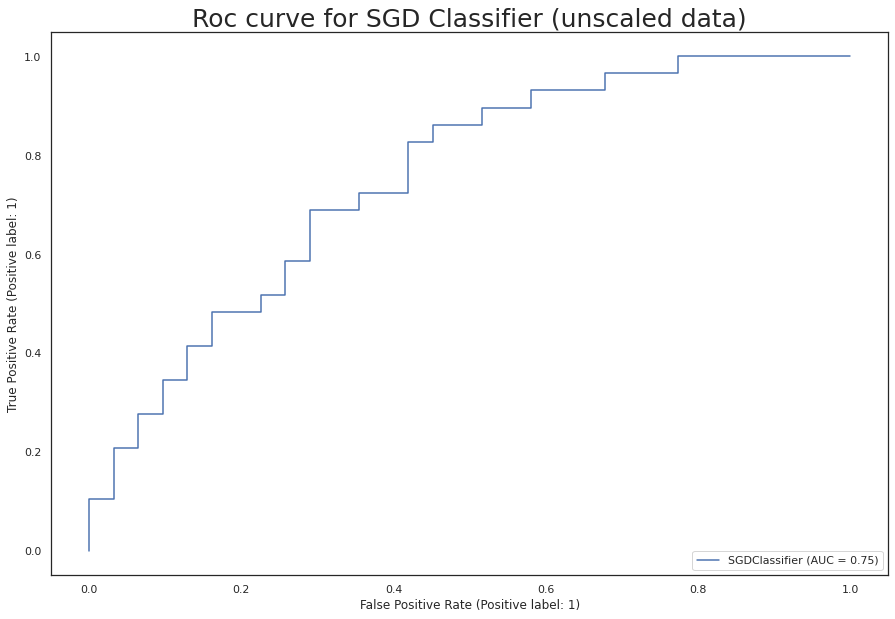

In [664]:
#ROC Curve for model trained by unscaled data
ax = plt.gca()
rfc_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)
plt.title("Roc curve for SGD Classifier (unscaled data)", fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


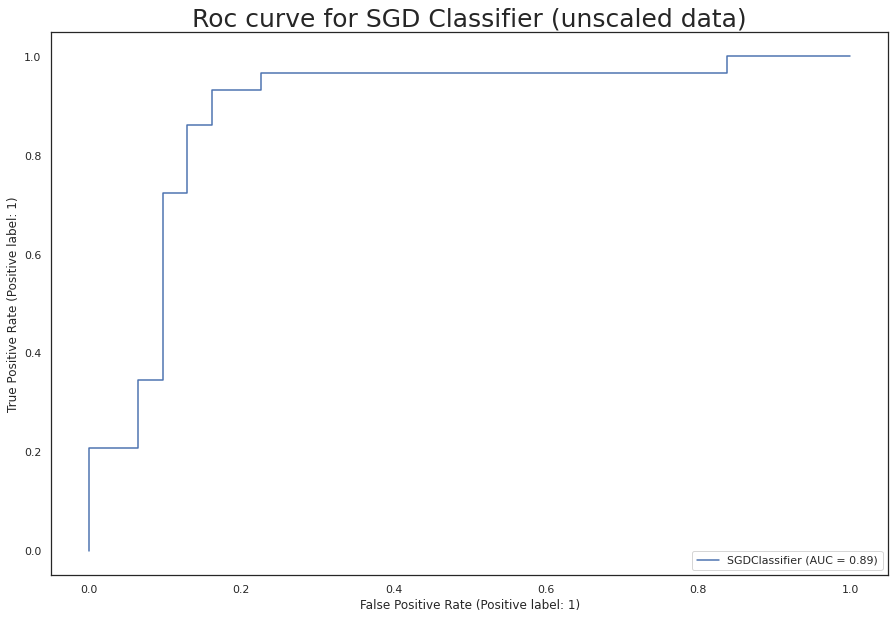

In [665]:
#ROC Curve for model trained by Scaled data
ax = plt.gca()
rfc_disp = plot_roc_curve(sgd_classifier2, scaled_X_test, scaled_Y_test, ax=ax)
plt.title("Roc curve for SGD Classifier (unscaled data)", fontsize=25)
plt.show()

# **RandomForest Classifier**

1.   Performing LogisticRegression with scaled and unscled data
2.   Display Accuracy scores on the training and testing sets
3.   Print the The confusion matrix for unscaled data
4.   Plot ROC Curve for model trained by unscaled data

In [666]:
# Lets use RandomForest Classifier (Unscled data)
from sklearn.ensemble import RandomForestClassifier 
rf_classifier = RandomForestClassifier(n_estimators=500, n_jobs=5)
rf_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(n_estimators=500, n_jobs=5)

In [667]:
# Lets use RandomForest Classifier (Scaled data)
from sklearn.ensemble import RandomForestClassifier 
rf_classifier2 = RandomForestClassifier(n_estimators=500, n_jobs=5)
rf_classifier2.fit(scaled_X_train, scaled_Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(n_estimators=500, n_jobs=5)

In [668]:
# Accuracy scores on the training and testing sets

score5 = round(rf_classifier.score(X_train, Y_train), 2) # training score
score6 = round(rf_classifier.score(X_test, Y_test), 2)   # testing score

scaled_score5 = round(rf_classifier2.score(scaled_X_train, scaled_Y_train), 2) # training score
scaled_score6 = round(rf_classifier2.score(scaled_X_test, scaled_Y_test), 2)   # testing score

print ("Unscaled data Training and Testing scores: %.2f, %.2f" %  (score5, score6))
print ("Scaled data Training and Testing scores: %.2f, %.2f" %  (scaled_score5, scaled_score6))

Unscaled data Training and Testing scores: 1.00, 0.80
Scaled data Training and Testing scores: 1.00, 0.80


In [669]:
# The confusion matrix (unscaled data)
from sklearn.metrics import confusion_matrix, classification_report
rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
rf_confusion_matrix = pd.DataFrame(rf_cm, index=labels, columns=labels)

print("Confusion Matrix (Unscaled)")
print('----------------------------')
print(rf_confusion_matrix)

print("Classification Report (Unscaled)")
print('----------------------------')
print(rf_cr)

Confusion Matrix (Unscaled)
----------------------------
    0   1
0  21  10
1   2  27
Classification Report (Unscaled)
----------------------------
              precision    recall  f1-score   support

           0       0.91      0.68      0.78        31
           1       0.73      0.93      0.82        29

    accuracy                           0.80        60
   macro avg       0.82      0.80      0.80        60
weighted avg       0.82      0.80      0.80        60



In [670]:
# The confusion matrix (unscaled data)
from sklearn.metrics import confusion_matrix, classification_report
rf_predictions2 = rf_classifier2.predict(scaled_X_test)

labels2 = rf_classifier2.classes_

# compute TP, TN, FP, FN values
rf_cm2 = confusion_matrix(y_true=scaled_Y_test, 
                      y_pred = rf_predictions2, 
                      labels = labels2)

# compute recall, precision, f1-scores
rf_cr2 = classification_report(y_true=scaled_Y_test, 
                      y_pred = rf_predictions2, 
                      labels = labels2)

# print confusion matrix
rf_confusion_matrix2 = pd.DataFrame(rf_cm2, index=labels2, columns=labels2)

print("Confusion Matrix (Scaled)")
print('----------------------------')
print(rf_confusion_matrix2)

print("Classification Report (Scaled)")
print('----------------------------')
print(rf_cr2)


Confusion Matrix (Scaled)
----------------------------
    0   1
0  21  10
1   2  27
Classification Report (Scaled)
----------------------------
              precision    recall  f1-score   support

           0       0.91      0.68      0.78        31
           1       0.73      0.93      0.82        29

    accuracy                           0.80        60
   macro avg       0.82      0.80      0.80        60
weighted avg       0.82      0.80      0.80        60



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


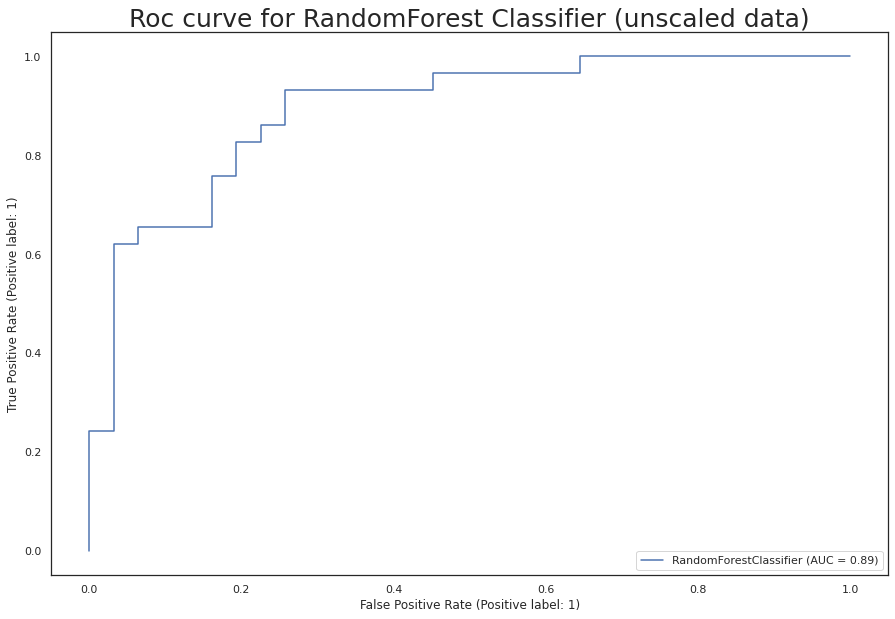

In [671]:
#ROC Curve for model trained by Scaled data
ax = plt.gca()
rfc_disp = plot_roc_curve(rf_classifier, X_test, Y_test, ax=ax)
plt.title("Roc curve for RandomForest Classifier (unscaled data)", fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


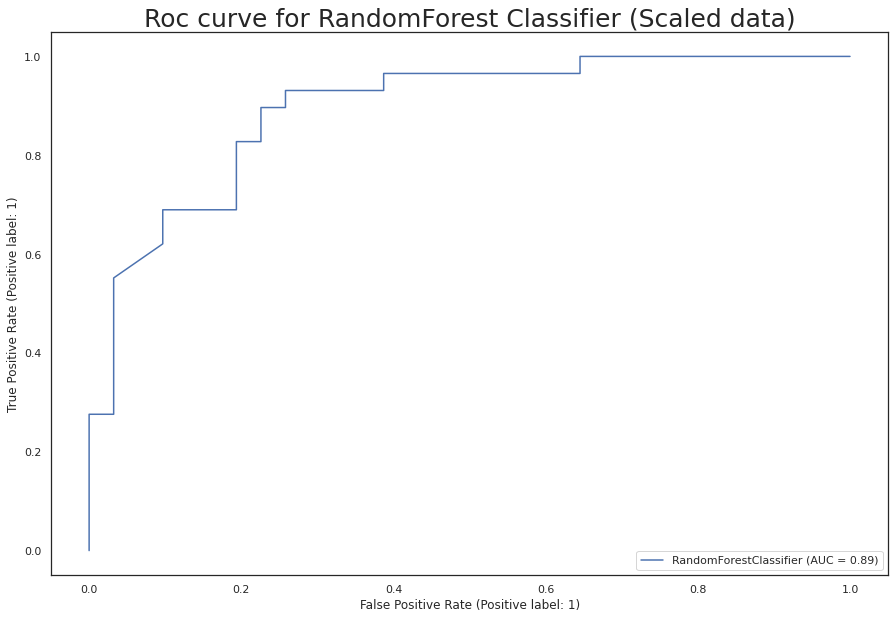

In [672]:
#ROC Curve for model trained by Scaled data
ax = plt.gca()
rfc_disp = plot_roc_curve(rf_classifier2, scaled_X_test, scaled_Y_test, ax=ax)
plt.title("Roc curve for RandomForest Classifier (Scaled data)", fontsize=25)
plt.show()

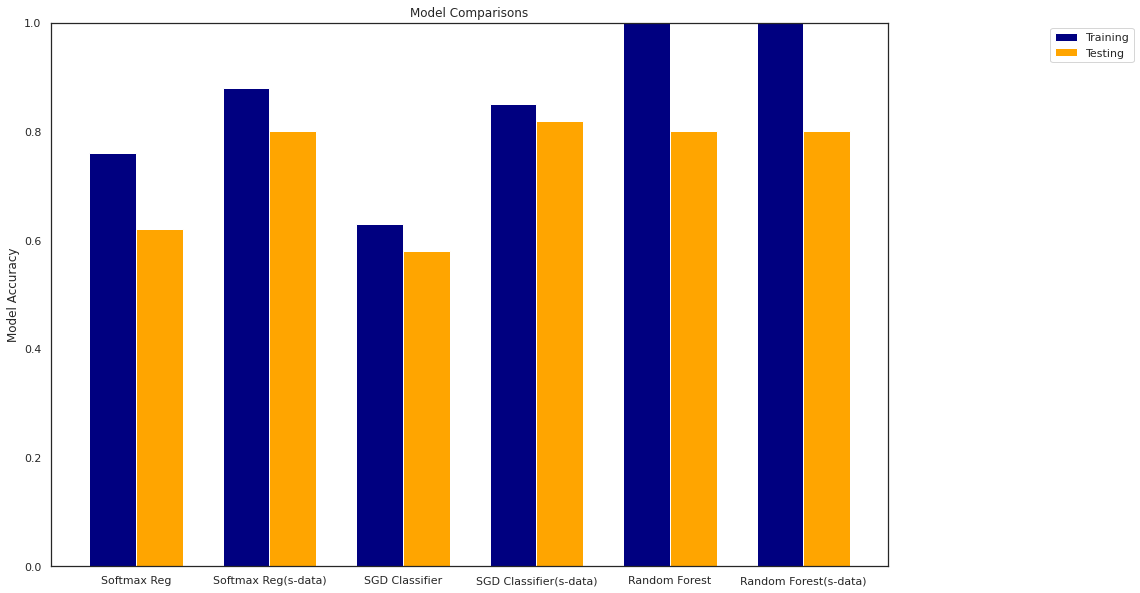

In [673]:
 #Summarize the findings for all models

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Softmax Reg', 'Softmax Reg(s-data)', 'SGD Classifier', 'SGD Classifier(s-data)', 'Random Forest', 'Random Forest(s-data)']
training_scores = [score1, scaled_score1, score3, scaled_score3, score5, scaled_score5]
testing_scores =  [score2, scaled_score2, score4, scaled_score4, score6, scaled_score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

# Summary

The project involved analysis of the heart disease in patients. After proper data processing 3 models were trained and tested.

**Feature correlation summery**

*  ‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target
*  ‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target
* ‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target


Model Training summery


1.   Logistic Regression shows singnificat improvement train and test results for scaled data
2.   SGD Clasifier shows the max improvement for train and test results for scaled data
3. Random forest didnt show any improvement for scaled data. 
4. Accuracy of most of the models were really close with scaled data.


**Model Summary**




Model |Train (Unscaled)|Test (Unscaled)|Train (Scaled)|Test (Scaled)
:-------------------|:---------------:|--------------------:|--------------------:|--------------------:
SoftMax Reg     |0.76 | 0.62 |0.88 | 0.80
SGD Clasifier|0.63 | 0.58 |0.85 | 0.82
Random Frrest|1.00 | 0.80 |1.00 | 0.80
